# Module 1 Labs Jupyter Notebook

This notebook explores models based on an image classification model for the Fashion-MNIST dataset using tf.keras. Extra code has been added for the purposes of this lab.

Based on: https://www.tensorflow.org/tutorials/keras/classification.



MIT License

Copyright (c) 2017 François Chollet

 Permission is hereby granted, free of charge, to any person obtaining a
 copy of this software and associated documentation files (the "Software"),
 to deal in the Software without restriction, including without limitation
 the rights to use, copy, modify, merge, publish, distribute, sublicense,
 and/or sell copies of the Software, and to permit persons to whom the
 Software is furnished to do so, subject to the following conditions:

 The above copyright notice and this permission notice shall be included in
 all copies or substantial portions of the Software.

 THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
 THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
 FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
 DEALINGS IN THE SOFTWARE.

## Module 1-Lab 1

### Import modules and define functions
Run the cell below

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import gzip
import tempfile
from tensorflow.python.keras.utils.data_utils import get_file
print("TensorFlow version is "+tf.__version__+".")
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
@tf.function(experimental_relax_shapes=True)
def ers_predict(model, input):
    x = model(input)
    return x
set = 0 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
start_image = (set*num_images)
end_image = (set*num_images)+num_images
print("Display functions defined.")

TensorFlow version is 2.6.2.
Display functions defined.


### Load fashion images for the model to classify

The next cell sets the names for the classified images. It then defines a function for loading validation data, which are images that will rull through the model. Finally it loads those images.
Run the cell now.

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def load_validation_data():
    """Loads the Fashion-MNIST dataset.

    Returns:
        Tuple of Numpy arrays: `(x_test, y_test)`.

    License:
        The copyright for Fashion-MNIST is held by Zalando SE.
        Fashion-MNIST is licensed under the [MIT license](
        https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).

    """
    base = "/tmp/data/"
    files = [
        "t10k-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
    ]

    paths = []
    for fname in files:
        paths.append(base + fname)

    with gzip.open(paths[0], "rb") as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], "rb") as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)
        

    return x_test, y_test

test_images, test_labels = load_validation_data()
test_images = test_images / 255.0
print("Images loaded.")

Images loaded.


### Define the untrained model
Note that model has: 
- 1 Flatten layer, which specifies an implicit input layer and then "flattens" the array of pixels into a 1-dimensional array
- 1 hidden (Dense) layer 
- 1 output (Dense) layer, which has the same number of nodes as there are classes for images

Run the cell below. (You can ignore the error, which indicates that this environment does not have any GPUs. That is okay for "inferencing" or showing the model in action. The actual training environment does have GPUs.)

In [3]:
ann_model = tf.keras.Sequential(
            [
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(128, activation="relu"),
                tf.keras.layers.Dense(10),
            ]
)
print("Untrained model defined.")

Untrained model defined.


### Run images through the untrained model 
Next you will run images through the untrained model. 
You will see the results below the cell. In this exercise, when the model processes an image, it determines a probability for the image belonging to each of the 10 classes. It then assigns the image to the class with the highest probability. You will see a  bar chart to the right of each image, which shows these probabiblities. Under each image, you will see the class to which the model assigns the image and the associated probability. The text is red if the class is incorrect and blue if it is correct. In parentheses, the results show the correct class. 

Run the cell below. 

Untrained model classifications


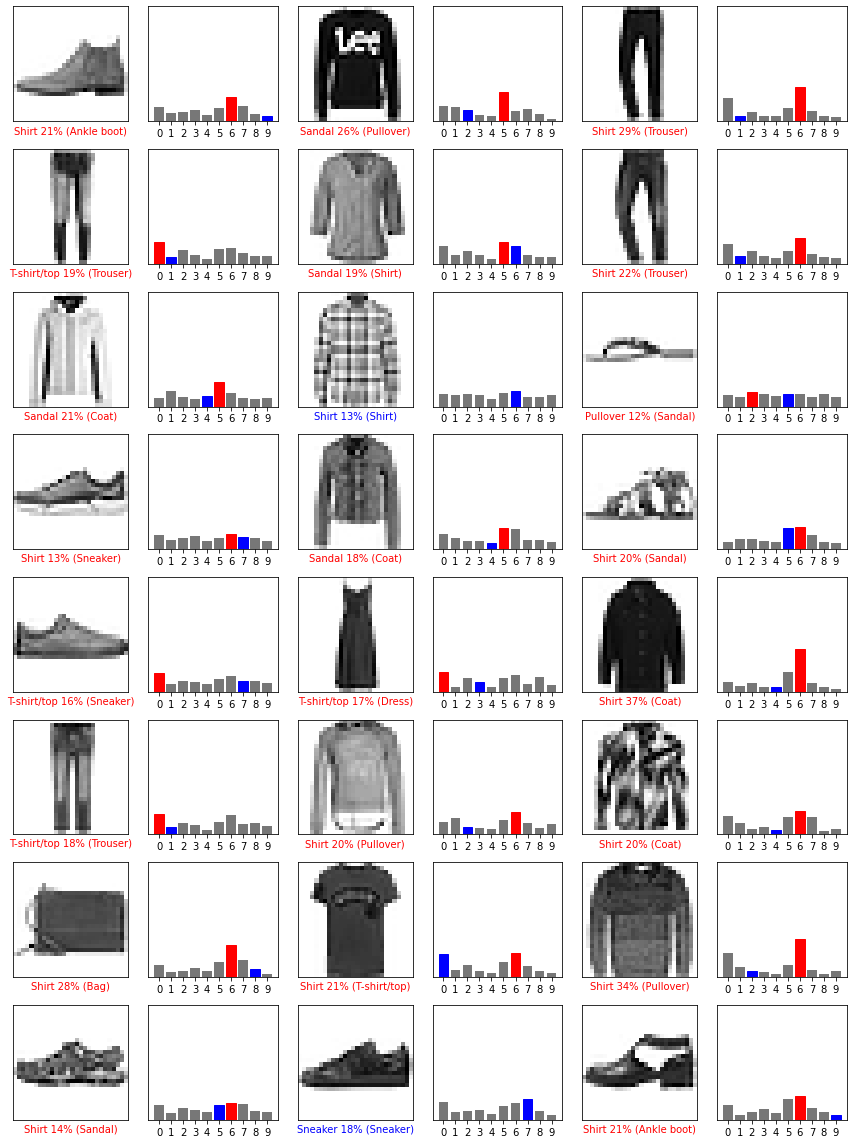

In [4]:
probability_model = tf.keras.Sequential([ann_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
print("\033[1m"+"Untrained model classifications"+"\033[0m")
plt.show()

### Stop
As you see, the untrained model is not very successful at classifying images.

You will now examine the Lab1_Constant experiment, which has already trained this same model. 
Return to the Module 1-Lab 1, Task 4 instructions. But leave this notebook open.

### Start here at Module 1-Lab 1 Task 5

### Load and use the trained model from "Lab1_Constant"
You explored the "Lab1_Constant" experiment in the Web UI. As you saw, the model accuracy improved over the course of the training until it achieved about 88% accuracy. You will now load the trained model and see it in action. 

Run the cell below. 
As you will see, the model is now successfully classifying most images. 

Trained model loaded.
Trained model classifications


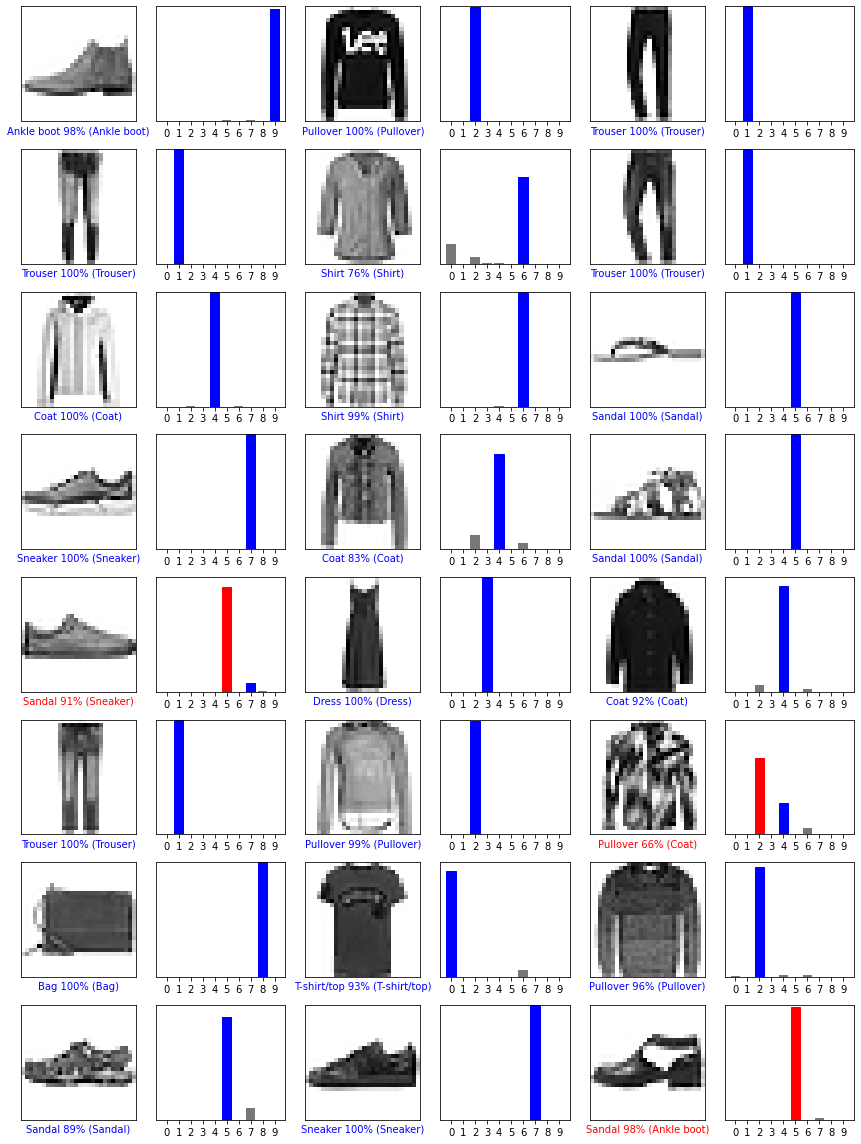

In [5]:
ann_model.load_weights("/tmp/determined-checkpoint/jear-bucket/e23aa58d-acc0-4416-bd7b-eef97aa6217d/determined-keras-model-weights").expect_partial()
print("\033[1m"+"Trained model loaded."+"\033[0m") 

probability_model = tf.keras.Sequential([ann_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
print("\033[1m"+"Trained model classifications"+"\033[0m")
plt.show()

### Examine a Convolutional Neural Network (CNN)
In the code below, examine a CNN model, defined for the same image classification purposes as the previous. This CNN model has: 
- 2 hidden Conv2D layers: 
  - The first layer both defines the input shape (creating an implicit input layer) and defines a convolutional layer with 64 3x3 filters
  - The second defines a convolutional layer with 128 3x3 filters 
- Two layers that reformat the outputs for the next layer (MaxPool2D and Flatten) 
- 1 hidden Dense layer, which has 128 nodes 
- 1 output (Dense) layer, which has the same number of nodes as there are classes for images

Run the cell.

In [6]:
cnn_model = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), padding="same", activation="relu"),
                tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(128, activation="relu"),
                tf.keras.layers.Dense(10),
            ]
)
print("Untrained model defined.")

Untrained model defined.


### Stop 

Return to the Module 1-Lab 1 instructions (Task 6, step 3).

### Start here after examining the Lab1_CNN_Constant experiment

### Load and use the trained model from "Lab1_CNN_Constant"
You explored the "Lab1_CNN_Constant" experiment in the Web UI. This training process used the same model defined above. By the end of the process, it had created a model with about 92% accuracy as opposed to about 88% with the non-CNN ANN. You will now load the model trained in this way. 

Run the cell below. As you see, the model is now successfully classifying more of the images than before. 

In [15]:
cnn_model.load_weights("/tmp/determined-checkpoint/jear-bucket/5a086eba-a776-4e0f-b64c-2c34a927cdbe/determined-keras-model-weights").expect_partial()
print("\033[1m"+"Trained CNN model loaded."+"\033[0m")
ch_test_images = np.expand_dims(test_images, axis=-1)
print("Channel dimension added to grayscale images to ensure proper input in the CNN.")
probability_model = tf.keras.Sequential([cnn_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(np.expand_dims(test_images, -1))
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, ch_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
print("\033[1m"+"Trained CNN model classifications"+"\033[0m")
plt.show()

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /tmp/determined-checkpoint/jear-bucket/5a086eba-a776-4e0f-b64c-2c34a927cdbe/determined-keras-model-weights

### Explore the CNN layers and filters
You will now explore the convolutional layers and their filters in a bit more detail.

#### Explore a filter
Run the cell below to:
- See one of the Conv2D layer 1 filters, which was created during the training process
- See what the image output by this "looks like"  

Filter 1 of Conv2D layer 1


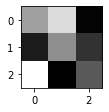

Example Test Image


NameError: name 'ch_test_images' is not defined

In [12]:
print("\033[1m"+"Filter 1 of Conv2D layer 1"+"\033[0m")
filters, biases = cnn_model.layers[0].get_weights()
f = filters[:, :, :, 0]
plt.figure(figsize=(1.5,1.5))
plt.imshow(f[:, :, :], cmap="gray")
plt.show()

print("\033[1m"+"Example Test Image"+"\033[0m")
img = ch_test_images[10]
plt.figure(figsize=(14,14))
plt.imshow(img, cmap=plt.cm.binary)
plt.show()
batch_img = tf.expand_dims(img, axis=0)

print("\033[1m"+"The filter slides across the complete image and outputs a 'feature map' with its results."+"\033[0m")

print("\033[1m"+"Here's what the output from this filter looks like."+"\033[0m")

conv_model = tf.keras.Sequential([cnn_model.layers[0]]) 
feature_map = conv_model.predict(batch_img)
plt.figure(figsize=(14, 14))
plt.imshow(feature_map[0, :, :, 0], cmap='gray')
plt.show()

#### More exploring filters
The auto-trained filters help the CNN pick out various relevant features. The processing can continue over multiple layers.

Run the cell below to see:
- All 64 filters in the Conv2D layer 1
- All the images output by these filters
- All the images output after passing through the Conv2D layer 2 filters
- All the images output after passing through the MaxPool2D layer, which reduces the size of the images and helps generalize key features

In [ ]:
print("\033[1m"+"All filters of Conv2D layer 1"+"\033[0m")
filters1, biases = cnn_model.layers[0].get_weights()
num_rows = 8
num_cols = 8
num_images = num_rows * num_cols
plt.figure(figsize=(24,24))
for i in range(num_images):
    f = filters1[:, :, :, i]
    ax = plt.subplot(num_rows, num_cols, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, :], cmap='gray')
plt.show()

print("\033[1m"+"Images after passing through Conv2D layer 1"+"\033[0m")
print("\033[1m"+"As you see, different filters highlight different features such as edges."+"\033[0m")
plt.figure(figsize=(24,24))
for i in range(num_images):
    ax = plt.subplot(num_rows, num_cols, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_map[0, :, :, i], cmap='gray')
plt.show()

print("\033[1m"+"Images after passing through Conv2D layer 2"+"\033[0m")
conv2_model = tf.keras.Sequential([cnn_model.layers[0], cnn_model.layers[1]]) 
feature_map2 = ers_predict(conv2_model, batch_img)
plt.figure(figsize=(24,12))
for i in range(num_images*2):
    ax = plt.subplot(num_rows, num_cols*2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_map2[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

print("\033[1m"+"Images after passing through MaxPool2D layer"+"\033[0m")
print("\033[1m"+"The images might look less clear to you. But the CNN is learning general features that indicate 'coat.'"+"\033[0m")
pooling_model = tf.keras.Sequential([cnn_model.layers[0], cnn_model.layers[1], cnn_model.layers[2]]) 
feature_map3 = ers_predict(pooling_model, batch_img)
plt.show()
plt.figure(figsize=(24,12))
for i in range(num_images*2):
    ax = plt.subplot(num_rows, num_cols*2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_map3[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

#### Continue to explore CNNs
Run the cell below to see how the output of the MaxPool2D layer for two different images of coats. 
Notice various filtered images resemble each other. 
From here, the example CNN is ready to flatten the images and send them through a hidden and dense layer, as with the earlier ANN you examined.  

In [ ]:
print("\033[1m"+"Example Coat 1 and Example Coat 2"+"\033[0m")
img2 = ch_test_images[6]
plt.figure(figsize=(14,28))
ax = plt.subplot(1, 2, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img, cmap=plt.cm.binary)
az = plt.subplot(1, 2, 2)
az.set_xticks([])
az.set_yticks([])
plt.imshow(img2, cmap=plt.cm.binary)
plt.show()

print("\033[1m"+"Example Coat 1 after passing through both Conv2 layers and the MaxPool2D layer"+"\033[0m")
plt.figure(figsize=(24,12))
for i in range(num_images*2):
    ax = plt.subplot(num_rows, num_cols*2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_map3[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

print("\033[1m"+"Example Coat 2 after passing through both Conv2 layers and the MaxPool2D layer"+"\033[0m")
print("\033[1m"+"Note the commonalities"+"\033[0m")
batch_img2 = tf.expand_dims(img2, axis=0)
feature_map4 = ers_predict(pooling_model, batch_img2)
plt.figure(figsize=(24,12))
for i in range(num_images*2):
    ax = plt.subplot(num_rows, num_cols*2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_map4[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

print("\033[1m"+"The CNN model can correctly classify both images."+"\033[0m")
plt.figure(figsize=(8, 2))
plt.subplot(1, 4, 1)
plot_image(10, predictions[10], test_labels, ch_test_images)
plt.subplot(1, 4, 2)
plot_value_array(10, predictions[10], test_labels)
plt.subplot(1, 4, 3)
plot_image(6, predictions[6], test_labels, ch_test_images)
plt.subplot(1, 4, 4)
plot_value_array(6, predictions[6], test_labels)
plt.tight_layout()
plt.show()

### Stop 

You have completed Module 1-Lab 1.

## Module 1-Lab 2

The code below redefines the model with the architecture determined by the HPO process. It then loads the trained model from the best checkpointed model created during the "Lab1_Adaptive" experiment. It then runs the images through the trained model and displays the results. Again you should see good performance.

Run the cell.

In [ ]:
cnn_adaptive_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(39, (3,3), input_shape=(28,28,1), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(94, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.336),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(497, activation="relu"),
    tf.keras.layers.Dropout(0.287),
    tf.keras.layers.Dense(10),])     
cnn_adaptive_model.load_weights("/tmp/determined-checkpoint/0e250b7f-9a20-47a6-9162-08e62e3f2a2f/determined-keras-model-weights").expect_partial()
print("\033[1m"+"Best model discovered in Adaptive ASHA experiment loaded"+"\033[0m")
probability_model = tf.keras.Sequential([cnn_adaptive_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(ch_test_images)
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
print("\033[1m"+"Classifications by CNN model trained with Adaptive ASHA"+"\033[0m")
print("\033[1m"+"This model has an accuracy over 93% and is now classifying even more images correctly."+"\033[0m")
plt.show()

### Stop

You have completed Module 1-Lab 2.